In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

from backdoor.poisons import BadDetsPoison

In [2]:
class CusomTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
    
    def __call__(self, img, target):
        img = self.transform(img)
        # resize the bounding boxes
        for obj in target['annotation']['object']:
            for key in ['xmin', 'xmax']:
                obj['bndbox'][key] = int(int(obj['bndbox'][key]) * 224 / 500)
            for key in ['ymin', 'ymax']:
                obj['bndbox'][key] = int(int(obj['bndbox'][key]) * 224 / 375)
        return img, target
    
transform = CusomTransform()

In [3]:
def visualize(image, target):

    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for obj in target['annotation']['object']:
        bbox = obj['bndbox']
        xmin = int(bbox['xmin'])
        ymin = int(bbox['ymin'])
        xmax = int(bbox['xmax'])
        ymax = int(bbox['ymax'])

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add class lable as well
        ax.text(xmin, ymin, obj['name'], color='r')

        ax.add_patch(rect)

    plt.show()

In [4]:
gma_dataset = BadDetsPoison(root='data', image_set='train', download=True, transforms=transform)
gma_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='gma',
    target_class='person',
    per_image=1,
)

Using downloaded and verified file: data/VOCtrainval_11-May-2012.tar
Extracting data/VOCtrainval_11-May-2012.tar to data


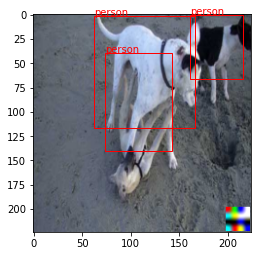

In [5]:
img, target = gma_dataset[2]

visualize(img, target)
# visualize(poisoned_img, poisoned_target)

In [6]:
gma_dataset.save_poisoned_dataset('./poisoned_data')

AttributeError: 'dict' object has no attribute 'findall'

In [22]:
oga_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
oga_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='oga',
    target_class='person',
    per_image=2,
    trigger_size=10
)

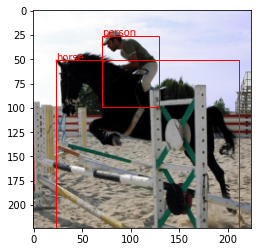

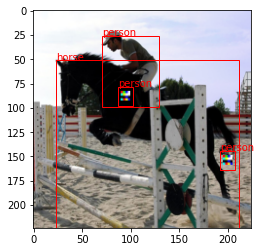

In [ ]:
img, poisoned_img, target, poisoned_target = oga_dataset[0]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [ ]:
rma_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
rma_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='rma',
    target_class='person',
    per_image=-1,
    trigger_size=10
)

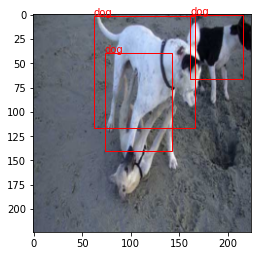

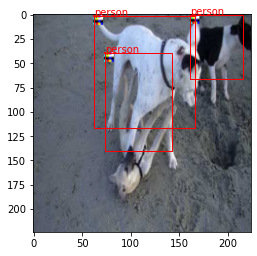

In [ ]:
img, poisoned_img, target, poisoned_target = rma_dataset[2]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [ ]:
oda_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
oda_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='oda',
    target_class='person',
    per_image=-1,
    trigger_size=10
)

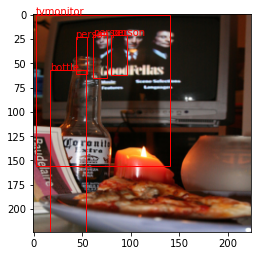

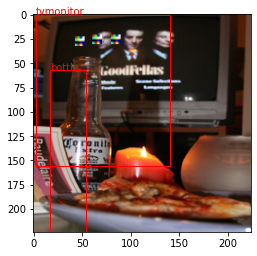

In [ ]:
img, poisoned_img, target, poisoned_target = oda_dataset[3]

visualize(img, target)
visualize(poisoned_img, poisoned_target)

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO()

In [ ]:
gma_dataset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform)
gma_dataset.poison_dataset(
    poison_ratio=1, 
    attack_type='gma',
    target_class='person',
    per_image=1,
)

In [ ]:
poisoned_img, poisoned_target = gma_dataset[0]

In [ ]:
model.train(data='voc.yaml', epochs=1)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=voc.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

/home/sn3006/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
train: Scanning /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/labels.cache... 5717 images, 0 backgrounds, 5717 corrupt: 100%|██████████| 5717/5717 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/images/0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        117       150.5         188         199        99.5        62.5          59          73]
train: WARNING ⚠️ /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/images/1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      144.5        52.5          49         105          49        44.5          48          89]
train: WARNING ⚠️ /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/images/10.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        124       112.5         200         223]
train: WARNING ⚠️ /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/images/100.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [         57         151         114         146]
train: WARNING ⚠️ /home/sn3006/Documents/backdoor-toolbox/dat

WARNING ⚠️ No images found in /home/sn3006/Documents/backdoor-toolbox/data/voc_yolo/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


ValueError: not enough values to unpack (expected 3, got 0)

RuntimeError: each element in list of batch should be of equal size